In [1]:
import pandas as pd
import glob
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D

# Φόρτωση όλων των αρχείων CSV 
csv_files = glob.glob('harth2/*.csv')

# Hierarchical

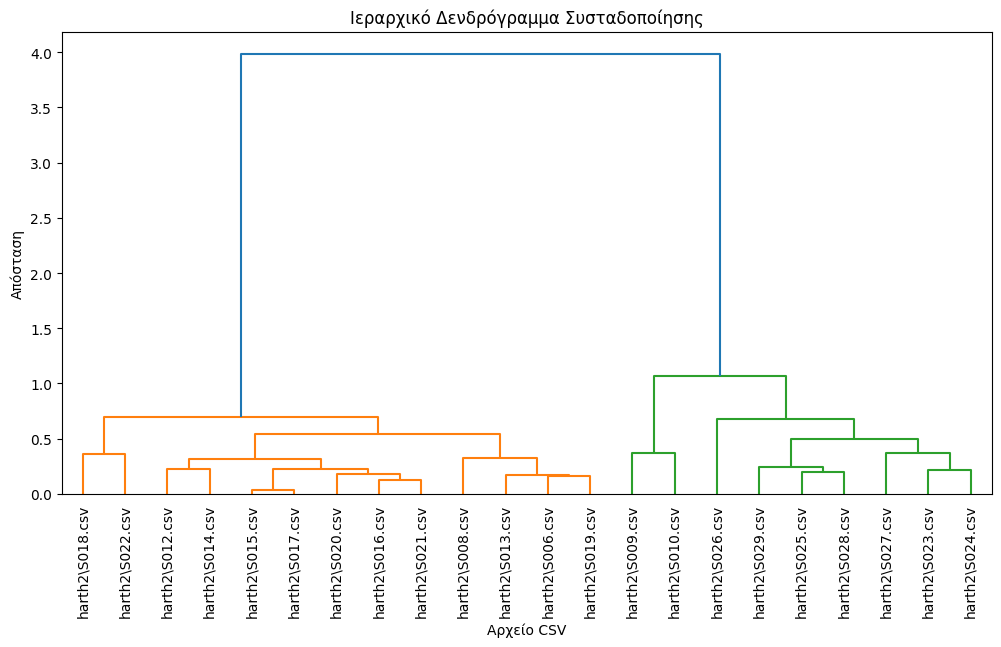

harth2\S006.csv ανήκει στη Συστάδα 1
harth2\S008.csv ανήκει στη Συστάδα 1
harth2\S009.csv ανήκει στη Συστάδα 2
harth2\S010.csv ανήκει στη Συστάδα 2
harth2\S012.csv ανήκει στη Συστάδα 1
harth2\S013.csv ανήκει στη Συστάδα 1
harth2\S014.csv ανήκει στη Συστάδα 1
harth2\S015.csv ανήκει στη Συστάδα 1
harth2\S016.csv ανήκει στη Συστάδα 1
harth2\S017.csv ανήκει στη Συστάδα 1
harth2\S018.csv ανήκει στη Συστάδα 1
harth2\S019.csv ανήκει στη Συστάδα 1
harth2\S020.csv ανήκει στη Συστάδα 1
harth2\S021.csv ανήκει στη Συστάδα 1
harth2\S022.csv ανήκει στη Συστάδα 1
harth2\S023.csv ανήκει στη Συστάδα 3
harth2\S024.csv ανήκει στη Συστάδα 3
harth2\S025.csv ανήκει στη Συστάδα 3
harth2\S026.csv ανήκει στη Συστάδα 3
harth2\S027.csv ανήκει στη Συστάδα 3
harth2\S028.csv ανήκει στη Συστάδα 3
harth2\S029.csv ανήκει στη Συστάδα 3


In [2]:
# Αρχικοποίηση λίστας για την αποθήκευση των τιμών διαμέσου των χαρακτηριστικών για τη συσταδοποίηση
median_feature_values = []

# Επανάληψη σε κάθε αρχείο CSV
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Εξαγωγή των τιμών των στηλών των αισθητήρων
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Υπολογισμός των τιμών διαμέσου για κάθε χαρακτηριστικό
        med_features = np.median(features, axis=0)
        # Αποθήκευση των τιμών διαμέσου των χαρακτηριστικών
        median_feature_values.append(med_features)

# Μετατροπή της λίστας των τιμών διαμέσου των χαρακτηριστικών σε πίνακα
X = np.array(median_feature_values)

# Εκτέλεση ιεραρχικής συσταδοποίησης βασισμένη στις τιμές διαμέσου των χαρακτηριστικών
Z = linkage(X, method='ward')

# Σχεδίαση του Hierarchical tree 
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=csv_files, leaf_rotation=90)
plt.title('Ιεραρχικό Δενδρόγραμμα Συσταδοποίησης')
plt.xlabel('Αρχείο CSV')
plt.ylabel('Απόσταση')
plt.show()

# Καθορισμός συστάδων από την ιεραρχική συσταδοποίηση
max_clusters = 3 
clusters = fcluster(Z, max_clusters, criterion='maxclust')

# Εκτύπωση της συστάδας στην οποία ανήκει κάθε αρχείο CSV
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        print(f"{csv_file} ανήκει στη Συστάδα {clusters[i]}")

# K-Means

C:\Users\karag\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\karag\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


The optimal number of clusters is 2
harth2\S006.csv belongs to Cluster 1
harth2\S008.csv belongs to Cluster 1
harth2\S009.csv belongs to Cluster 1
harth2\S010.csv belongs to Cluster 2
harth2\S012.csv belongs to Cluster 1
harth2\S013.csv belongs to Cluster 1
harth2\S014.csv belongs to Cluster 1
harth2\S015.csv belongs to Cluster 1
harth2\S016.csv belongs to Cluster 1
harth2\S017.csv belongs to Cluster 1
harth2\S018.csv belongs to Cluster 1
harth2\S019.csv belongs to Cluster 1
harth2\S020.csv belongs to Cluster 1
harth2\S021.csv belongs to Cluster 1
harth2\S022.csv belongs to Cluster 1
harth2\S023.csv belongs to Cluster 2
harth2\S024.csv belongs to Cluster 2
harth2\S025.csv belongs to Cluster 2
harth2\S026.csv belongs to Cluster 2
harth2\S027.csv belongs to Cluster 2
harth2\S028.csv belongs to Cluster 2
harth2\S029.csv belongs to Cluster 2


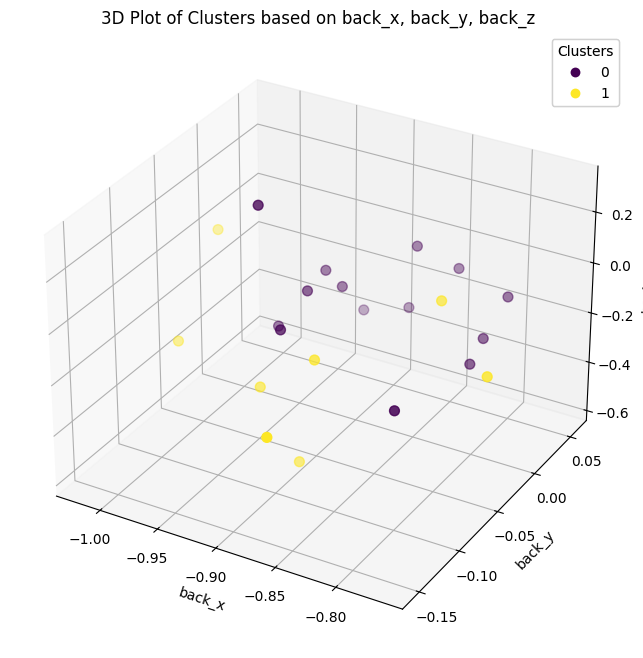

In [3]:
# λίστα αποθήκευση των μέσων τιμών χαρακτηριστικών για συσταδοποίηση
average_feature_values = []

# Επανάληψη για κάθε αρχείο CSV
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
         # Εξαγωγή των τιμών των στηλών των αισθητήρων
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Υπολογισμός των μέσων τιμών για κάθε χαρακτηριστικό
        avg_features = np.mean(features, axis=0)
        # Αποθήκευση των μέσων τιμών χαρακτηριστικών
        average_feature_values.append(avg_features)

# Μετατροπή της λίστας των μέσων τιμών χαρακτηριστικών σε πίνακα
X = np.array(average_feature_values)

# Καθορισμός του ιδανικού αριθμού συστάδων χρησιμοποιώντας τη μέθοδο Silhouette
silhouette_scores = []
range_n_clusters = range(2, 8)  

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Εύρεση του αριθμού των συστάδων με την υψηλότερη βαθμολογία Silhouette
optimal_n_clusters = max(silhouette_scores, key=lambda item: item[1])[0]

print(f"The optimal number of clusters is {optimal_n_clusters}")

# Εκτέλεση συσταδοποίησης με βάση τον ιδανικό αριθμό συστάδων
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Εκτύπωση της συστάδας στην οποία ανήκει κάθε αρχείο CSV
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        print(f"{csv_file} belongs to Cluster {clusters[i] + 1}")

# Δημιουργία τρισδιάστατου γραφήματος των συστάδων βασισμένο στα back_x, back_y, back_z
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Ετικέτες αξόνων
ax.set_title('3D Plot of Clusters based on back_x, back_y, back_z')
ax.set_xlabel('back_x')
ax.set_ylabel('back_y')
ax.set_zlabel('back_z')

plt.show()

# DB SCAN

In [4]:
# Αρχικοποίηση λίστας για την αποθήκευση των τιμών διαμέσου των χαρακτηριστικών για τη συσταδοποίηση
median_feature_values = []

# Επανάληψη σε κάθε αρχείο CSV
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Εξαγωγή των τιμών των στηλών των αισθητήρων
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Υπολογισμός των τιμών διαμέσου για κάθε χαρακτηριστικό
        med_features = np.median(features, axis=0)
        # Αποθήκευση των τιμών διαμέσου των χαρακτηριστικών
        median_feature_values.append(med_features)

# Μετατροπή της λίστας των τιμών διαμέσου των χαρακτηριστικών σε πίνακα
X = np.array(median_feature_values)

# Εκτέλεση συσταδοποίησης DBSCAN βασισμένη στις τιμές διαμέσου των χαρακτηριστικών
dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(X)

# Καθορισμός των μοναδικών ετικετών συστάδων
unique_clusters = np.unique(clusters)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# Εκτύπωση της συστάδας στην οποία ανήκει κάθε αρχείο CSV
print(f"Αριθμός συστάδων που βρέθηκαν: {num_clusters}")
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        cluster_label = clusters[i]
        cluster_number = cluster_label + 1 if cluster_label != -1 else 'Θόρυβος'
        print(f"{csv_file} ανήκει στη Συστάδα {cluster_number}")


Αριθμός συστάδων που βρέθηκαν: 2
harth2\S006.csv ανήκει στη Συστάδα 1
harth2\S008.csv ανήκει στη Συστάδα 1
harth2\S009.csv ανήκει στη Συστάδα 2
harth2\S010.csv ανήκει στη Συστάδα 2
harth2\S012.csv ανήκει στη Συστάδα 1
harth2\S013.csv ανήκει στη Συστάδα 1
harth2\S014.csv ανήκει στη Συστάδα 1
harth2\S015.csv ανήκει στη Συστάδα 1
harth2\S016.csv ανήκει στη Συστάδα 1
harth2\S017.csv ανήκει στη Συστάδα 1
harth2\S018.csv ανήκει στη Συστάδα 1
harth2\S019.csv ανήκει στη Συστάδα 1
harth2\S020.csv ανήκει στη Συστάδα 1
harth2\S021.csv ανήκει στη Συστάδα 1
harth2\S022.csv ανήκει στη Συστάδα 1
harth2\S023.csv ανήκει στη Συστάδα 2
harth2\S024.csv ανήκει στη Συστάδα 2
harth2\S025.csv ανήκει στη Συστάδα 2
harth2\S026.csv ανήκει στη Συστάδα 2
harth2\S027.csv ανήκει στη Συστάδα 2
harth2\S028.csv ανήκει στη Συστάδα 2
harth2\S029.csv ανήκει στη Συστάδα 2
